
## Question 1 — What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
- **Artificial Intelligence (AI):** Broad field aiming to build machines that perform tasks that normally require human intelligence (planning, perception, reasoning). Techniques include rule-based systems, search algorithms, ML, and more. Applications: chatbots, game playing, autonomous vehicles.
- **Machine Learning (ML):** Subset of AI focused on algorithms that learn patterns from data to make predictions or decisions. Techniques: supervised, unsupervised, reinforcement learning. Applications: classification, regression, recommendation systems.
- **Deep Learning (DL):** Subfield of ML using deep neural networks (many layered architectures). Particularly effective for unstructured data (images, audio, text). Techniques: CNNs, RNNs, Transformers. Applications: image recognition, speech recognition, large-language models.
- **Data Science:** Interdisciplinary field combining statistics, data engineering, domain knowledge, and ML to extract insights and build data products. Involves data cleaning, EDA, visualization, modeling, and communication of results.

**Scope/Techniques/Applications summary:** AI (broad) → ML (data-driven algorithms) → DL (neural-network-based). Data Science uses all of these plus engineering and communication to solve real-world problems.



## Question 2 — Explain overfitting and underfitting in ML. How can you detect and prevent them?

**Underfitting:**
- Occurs when the model is too simple to capture the underlying data patterns.
- Results in high bias and low variance.
- Model performs poorly on both training and test data.
- Causes: using an overly simple model, too few features, or too much regularization.

**Overfitting:**
- Happens when a model learns noise and random fluctuations from the training data instead of true patterns.
- Results in low training error but high test error, indicating poor generalization.
- Causes: very complex model, small dataset, or lack of regularization.

**Bias-Variance Tradeoff**:

The total error of a model can be broken down as:
$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$
- High Bias → Underfitting (model misses trends)
- High Variance → Overfitting (model is too sensitive to training data)
- Goal: Find balance where both bias and variance are moderate → minimum total error.

**Methods to Detect:**

1)Train-Validation Split: Compare errors. Large gap → Overfitting.

2)Cross-Validation (k-fold):
- Divide data into k parts. Train on k−1, test on 1. Repeat k times.
- Average validation error gives reliable estimate.
- High CV error → Underfitting; High variance in CV scores → Overfitting.

3)Learning Curves:

- Plot error vs. training size.
- Overfitting: Training error low, validation error high & decreases slowly.
- Underfitting: Both errors high and don’t improve with more data.

**Prevention Techniques**

**A. To Prevent Underfitting (Reduce Bias):**

- Use a more complex model (e.g., polynomial instead of linear).
- Add relevant features or feature engineering.
- Train for more epochs (if using neural networks).
- Reduce regularization strength.

**B. To Prevent Overfitting (Reduce Variance):**

**Regularization:**

- L1 (Lasso): Adds $ \lambda \sum |w_i| $ → promotes sparsity.
- L2 (Ridge): Adds $ \lambda \sum w_i^2 $ → shrinks weights.
- Elastic Net: Combines L1 and L2.
- Tune $ \lambda $ using cross-validation.


**Cross-Validation:**

- Use for hyperparameter tuning (e.g., tree depth, $ \lambda $).
- Grid Search / Random Search with CV selects best model.


**More Training Data:**

- Reduces chance of memorizing noise.
- Use data augmentation (e.g., flip, rotate images).


**Early Stopping:**

- Stop training when validation error starts increasing.

**Ensemble Methods:**

- Bagging (Random Forest), Boosting → reduce variance.


**Dropout (Neural Networks):**

- Randomly drop neurons during training.


**Pruning (Decision Trees):**

- Remove unnecessary branches after training.


## Question 3 — How would you handle missing values in a dataset? Explain at least three methods with examples.

# 1.Deletion:
 **When to use:**
 When missing data is very small (<5%) and Missing Completely at Random (MCAR).

**How it works:**
- Listwise Deletion: Remove entire rows with any missing value.
- Pairwise Deletion: Use only available data for each calculation (e.g., in correlation).

**Example:**
Consider a dataset of 100 students with columns: Age, Marks, Attendance. 3 students have missing Marks.

**Listwise Deletion** → Remove rows 2, 5, 8 → Now 97 rows.

**Advantage:** Simple, no assumptions.

**Disadvantage:** Loss of data → reduced statistical power.

# 2. Imputation (mean/median/mode):
**When to use:** When data is Missing at Random (MAR) and variable is numeric (mean/median) or categorical (mode).
**How it works:**Replace missing values with central tendency.
**Example:**
Age column: [19, 20, ?, 22, 18, ?, 21]
- Mean = (19+20+22+18+21)/5 = 20
- Median = 20 (sorted: 18,19,20,21,22) → Impute 20 for both missing values.

Sample python code:
`df['Age'].fillna(df['Age'].median(), inplace=True)`
**Advantage:** Fast, preserves sample size.

**Disadvantage:** Reduces variance, can distort distribution.

# 3. Predictive modeling (KNN, Regression, MICE):

 **When to use:** When missing data is MAR, >10% missing, or relationships with other features are strong.

 **How it works:** Treat missing column as target and predict using other features.

**A. K-Nearest Neighbors (KNN) Imputation**
- Find K most similar rows (using non-missing features).
- Impute average (or weighted) of their values.

**Example:**
Predict missing Marks using Attendance and Study_Hours.

|-- ID --|-- Attendance --|--  Study_Hours --| -- Marks

|-- 1 ---|------ 90 -------|------- 5 --------|------     85

|-- 2 ---|------ 88 -------|------- 4 --------|------     ?

|-- 3 ---|------ 95 -------|------- 6 --------|------     90

→ Row 2 is closest to Row 1 and 3 → Impute (85+90)/2 = 87.5

**B. Multiple Imputation by Chained Equations (MICE)**
- Iteratively impute each missing column using regression on others.
- Creates multiple datasets → averages results.

** Python (scikit-learn): **

`from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df)`

**Advantage:** Uses relationships in data → more accurate.

**Disadvantage:** Computationally expensive.



## Question 4 — Question 4:What is an imbalanced dataset? Describe two techniques to handle it

An imbalanced dataset occurs when the target classes are not represented equally — one class (majority) has far more samples than another (minority).

**Example:**
- Fraud detection (99% genuine, 1% fraud)

- Disease prediction (95% healthy, 5% diseased)

**Problems Caused by Imbalance**

- High overall accuracy but poor recall for minority class.

- Misleading evaluation metrics (accuracy may seem high even when the model fails on minority class).

- Example: Predicting all “non-fraud” may give 99% accuracy but 0% recall for frauds.

# Techniques to Handle Imbalanced Data

**A) Random Over/Under Sampling (Data-Level Methods)**

- Oversampling: Duplicate or generate more samples from the minority class.

- Undersampling: Remove some samples from the majority class.

- Example (Practical):

`
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y) `

- Advantage: Simple and effective for small datasets.

- Drawback: Oversampling may cause overfitting; undersampling may lose information.

**B) SMOTE (Synthetic Minority Over-sampling Technique)**

- Concept: Instead of duplicating data, SMOTE creates synthetic examples of the minority class using interpolation between nearest neighbors.

- Example (Practical):
`
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)`

- Advantage: Balances classes more naturally and improves model generalization.

- Drawback: Can introduce noise if classes overlap.

**C) Class Weights (Algorithm-Level Technique)**

- Concept: Assign higher weights to minority classes during model training so misclassifying them is penalized more.

- Example (Practical):
`
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)`

- Advantage: No data modification, works well for tree-based and linear models.

**4. Evaluation Metrics for Imbalanced Data**

Use metrics that focus on minority class performance:

- Precision, Recall, F1-score, ROC-AUC, PR-AUC instead of accuracy.




## Question 5 — Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.

# 1. Why Feature Scaling is Important
Feature scaling is the process of normalizing or standardizing the range of independent variables so that no feature dominates others due to its magnitude.

- Many ML algorithms (especially distance-based like KNN, SVM, K-Means) and gradient-based methods (like Logistic Regression, Neural Networks) are sensitive to feature scales.

- Without scaling, features with larger ranges can bias distance or gradient calculations, leading to poor performance and slow convergence.

- Scaling ensures all features contribute equally to the learning process.

**Example:**
If Age = [18–60] and Income = [10,000–100,000], income will dominate distance metrics unless scaled.

# 2. Two Common Scaling Techniques
A) Min–Max Scaling (Normalization)

- Formula: X′=Xmax​−Xmin/​X−Xmin​​
- Range: [0, 1] (or custom range).

- Use Case: When the data distribution is not Gaussian or features have different units.

- Example:
`
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
`
- Advantages: Keeps all features within the same range.
- Drawback: Sensitive to outliers since it depends on min/max values.

B) Standardization (Z-score Scaling)
- Formula:X′=X−μ/σ
- Effect: Centers data around mean 0 and standard deviation 1.
- Use Case: When data follows a Gaussian (normal) distribution or when used in gradient-based models.
- Example:​
`
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
`
- Advantages: Less affected by outliers; suitable for most ML algorithms.

- Drawback: Transformed values are not bounded (can be negative).

3. Impact on Algorithms

1) KNN / K-Means / SVM =These use Euclidean distance; unscaled features distort distances.

2)Gradient Descent-based models = Scaling helps faster convergence and prevents oscillation during optimization.

3)Tree-based models (Decision Tree, Random Forest) = Not affected, since they use splits, not distances.




## Question 6 — Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?

# 1. Label Encoding
**Definition:**

Label Encoding converts each category into a unique numeric value.
`
Color → {Red: 0, Blue: 1, Green: 2}
`

**When to Use:**

Suitable for ordinal data, where categories have a natural order or ranking, such as Low < Medium < High.

**Advantages:**

- Simple and memory-efficient.

- Keeps the order information in ordinal data.

**Disadvantages:**

- Not suitable for nominal data (no order).

- Models may wrongly assume relationships between numbers (for example, "Green > Blue").

`
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])
`

# 2. One-Hot Encoding
**Definition:**

One-Hot Encoding creates separate binary columns for each category. Each column represents whether a category is present (1) or not (0).
Example:
`
Color → Red [1,0,0], Blue [0,1,0], Green [0,0,1]`

**When to Use:**

Used for nominal data, where there is no natural order among categories, such as Gender, City, Country.

**Advantages:**

- Prevents models from assuming any numeric relationship between categories.

- Works well with algorithms like linear regression, logistic regression, and KNN.

**Disadvantages:**

- Increases the number of columns (especially for features with many unique categories).

- Can lead to sparse data representation.
`
import pandas as pd
df = pd.get_dummies(df, columns=['Color'], drop_first=True)`

# 3. When to Prefer Which

- Label Encoding: Use when data is ordinal (e.g., Education Level: Low, Medium, High).

- One-Hot Encoding: Use when data is nominal (e.g., Country: India, USA, UK).

- For tree-based models (like Decision Trees or XGBoost), Label Encoding can also work.

- For linear or distance-based models (like KNN, SVM), One-Hot Encoding is better because it avoids false numeric relationships.




In [1]:

# Common imports and helper functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,5)

def load_csv_from_github(owner_repo, filename):
    """Construct raw.githubusercontent URL and read CSV into pandas DataFrame."""
    url = f"https://raw.githubusercontent.com/{owner_repo}/main/{filename}"
    print("Loading:", url)
    return pd.read_csv(url)


Loading: https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv
Top 5 categories with highest average ratings:
               Category  count      mean
11               EVENTS     45  4.435556
9             EDUCATION    155  4.389032
1        ART_AND_DESIGN     62  4.358065
4   BOOKS_AND_REFERENCE    178  4.346067
24      PERSONALIZATION    314  4.335987

Bottom 5 categories with lowest average ratings:
               Category  count      mean
19            LIFESTYLE    314  4.094904
32        VIDEO_PLAYERS    160  4.063750
20  MAPS_AND_NAVIGATION    124  4.051613
30                TOOLS    734  4.047411
8                DATING    195  3.970769


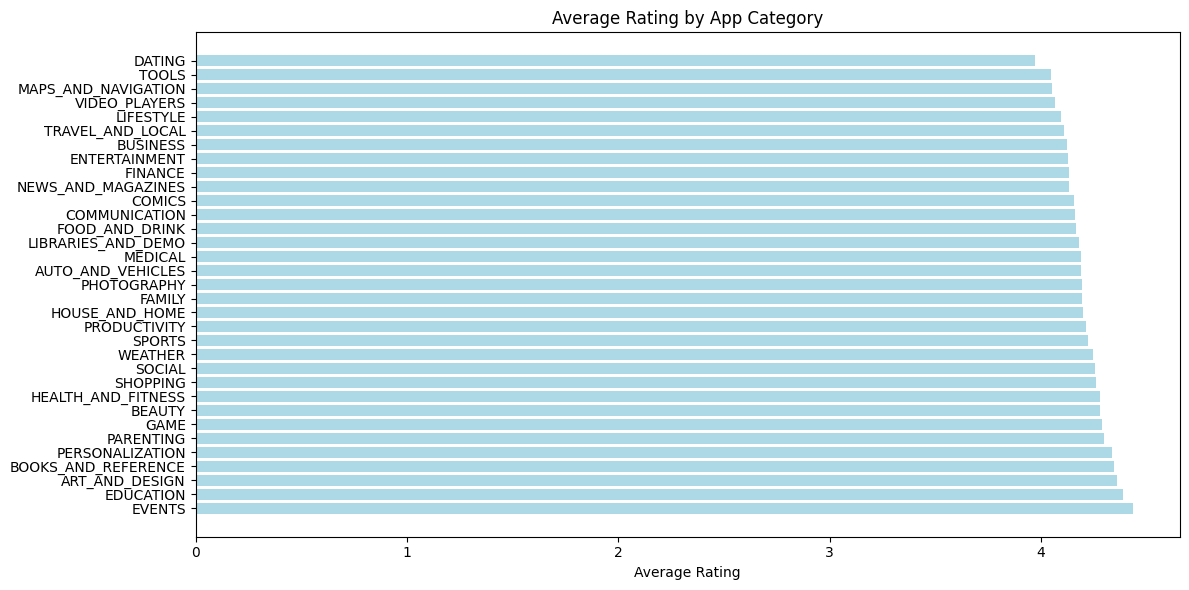

In [3]:

''' Question 7 — a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?'''

# Question 7(a) - Google Play Store: Relationship between categories and ratings
owner_repo = 'MasteriNeuron/datasets'
google_file = 'googleplaystore.csv'
df_gp = load_csv_from_github(owner_repo, google_file)

# Convert Rating to numeric and drop missing values
df_gp['Rating'] = pd.to_numeric(df_gp['Rating'], errors='coerce')
df_gp = df_gp.dropna(subset=['Category', 'Rating'])

# Group by category to get average rating and number of apps
cat_ratings = df_gp.groupby('Category')['Rating'].agg(['count', 'mean']).reset_index()

# Filter out categories with very few apps (<30) to avoid small-sample bias
cat_ratings = cat_ratings[cat_ratings['count'] > 30]

# Sort by average rating
cat_ratings = cat_ratings.sort_values('mean', ascending=False)

# Display top 5 and bottom 5 categories
print("Top 5 categories with highest average ratings:")
print(cat_ratings.head(5))

print("\nBottom 5 categories with lowest average ratings:")
print(cat_ratings.tail(5))

# Plot the results
plt.figure(figsize=(12,6))
plt.barh(cat_ratings['Category'], cat_ratings['mean'], color='lightblue')
plt.xlabel('Average Rating')
plt.title('Average Rating by App Category')
plt.tight_layout()
plt.show()


# Why highest-rated categories perform well:

- Apps in Education, Books, or Health focus on usefulness and stability.

- They usually have less competition and targeted user bases who appreciate quality.

- Fewer intrusive ads and cleaner interfaces improve user experience.

# Why lowest-rated categories perform poorly:

- Categories like Games, Social, and Shopping are crowded with low-quality or ad-heavy apps.

- Frequent crashes, fake reviews, or misleading promotions lead to poor feedback.

- Larger audiences result in more mixed and critical reviews, pulling down the average.

Loading: https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


,age_group,Survived
0,adult,0.361183
1,child,0.539823


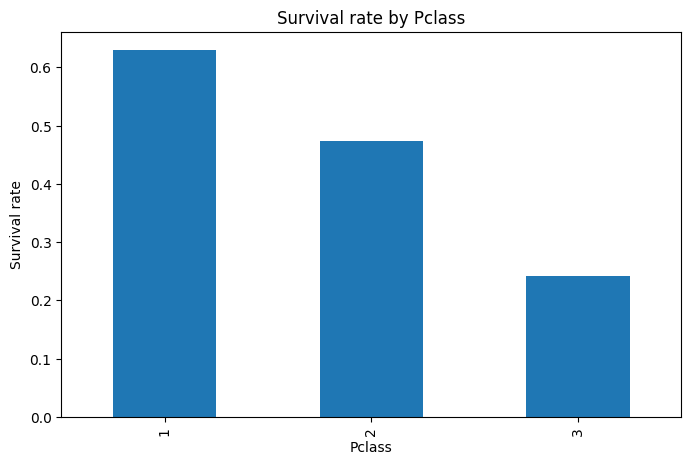

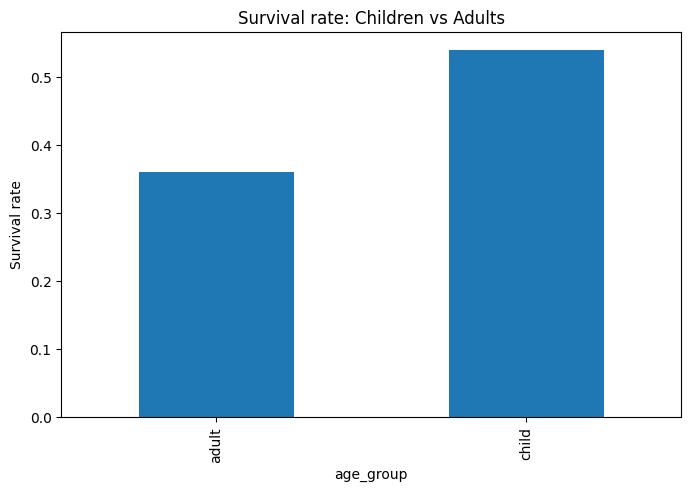

In [4]:

''' Question 8 — a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
survival rate, and why do you think that happened?
b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git'''

titanic_file = 'titanic.csv'
df_t = load_csv_from_github(owner_repo, titanic_file)

# Ensure necessary columns exist
for col in ['Survived','Pclass','Age']:
    if col not in df_t.columns:
        print(f'Column {col} not found. Available columns: {df_t.columns.tolist()}')

# Survival rate by Pclass
surv_by_class = df_t.groupby('Pclass')['Survived'].mean().reset_index().sort_values('Survived', ascending=False)
display(surv_by_class)

# Age groups: children (<18) vs adults (>=18)
df_t['Age'] = pd.to_numeric(df_t['Age'], errors='coerce')
df_t['age_group'] = np.where(df_t['Age'] < 18, 'child', 'adult')
surv_by_agegroup = df_t.groupby('age_group')['Survived'].mean().reset_index()
display(surv_by_agegroup)

# Visuals
plt.figure()
surv_by_class.set_index('Pclass')['Survived'].plot(kind='bar')
plt.ylabel('Survival rate')
plt.title('Survival rate by Pclass')
plt.show()

plt.figure()
surv_by_agegroup.set_index('age_group')['Survived'].plot(kind='bar')
plt.ylabel('Survival rate')
plt.title('Survival rate: Children vs Adults')
plt.show()


# Interpretation

**(a) Passenger Class and Survival:**

- 1st Class passengers had the highest survival rate, while 3rd Class had the lowest.

**Likely reasons:**

- Cabin location: 1st Class cabins were closer to the upper decks and lifeboats.

- Priority: Wealthier passengers often received first access to lifeboats.

- Socio-economic factor: Better cabins, quicker evacuation, and more crew attention improved survival chances.

**(b) Age and Survival:**

- Children (<18) had a higher survival rate than adults.

**Likely reasons:**

- The “Women and Children First” rescue rule followed during evacuation.

- Adults (especially men) were more likely to sacrifice seats for families.

- Crew may have prioritized families with kids for lifeboats.

Loading: https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv
Dataset Shape: (300153, 12)
Columns: ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


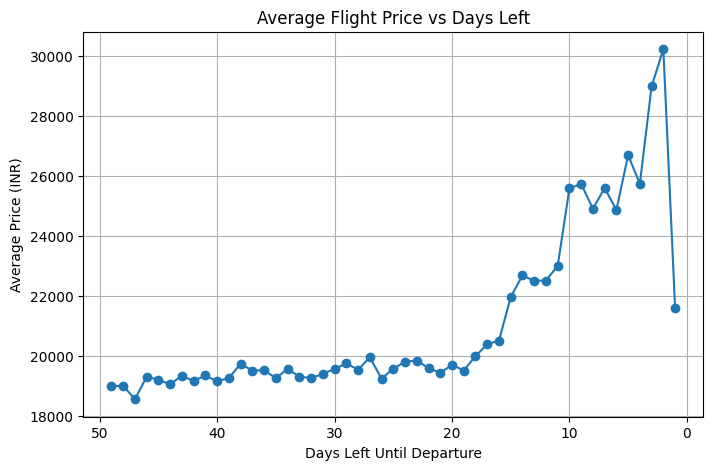


Average prices closer to departure (fewer days left) are higher.
We can now identify the best booking window based on curve patterns.

Average Price per Airline (Delhi–Mumbai Route):
     airline         price
0    AirAsia   3981.191456
3     Indigo   4473.739130
4   SpiceJet   4628.251984
2   GO_FIRST   5762.211515
1  Air_India  23695.916916
5    Vistara  26630.293322


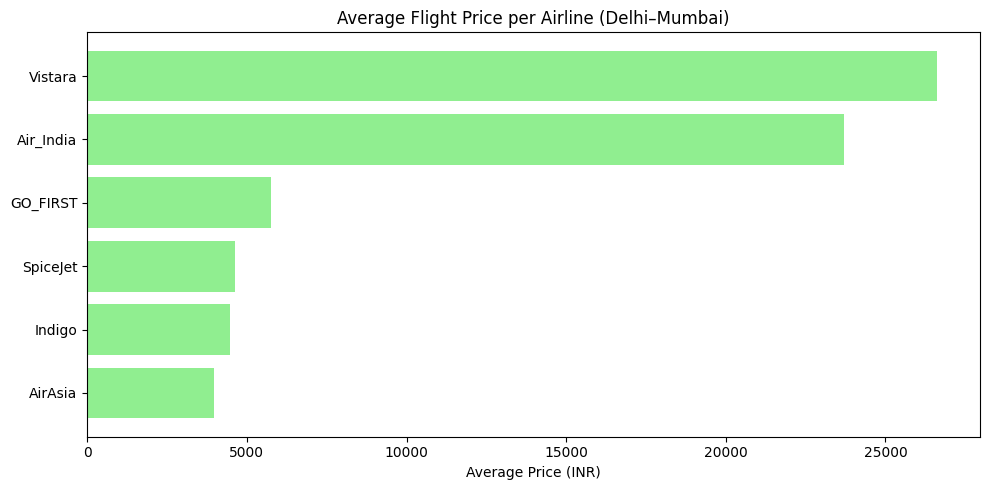

In [6]:
''' Question 9 — a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why? '''

owner_repo = 'MasteriNeuron/datasets'
flight_file = 'flight_price.csv'
df_f = load_csv_from_github(owner_repo, flight_file)

# Show structure
print("Dataset Shape:", df_f.shape)
print("Columns:", df_f.columns.tolist())
df_f.head()

# Convert price and days_left columns to numeric
df_f['price'] = pd.to_numeric(df_f['price'], errors='coerce')
df_f['days_left'] = pd.to_numeric(df_f['days_left'], errors='coerce')

# --- (a) Price vs Days Left ---
# Calculate average price by days left
price_by_days = df_f.groupby('days_left')['price'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.plot(price_by_days['days_left'], price_by_days['price'], marker='o')
plt.xlabel('Days Left Until Departure')
plt.ylabel('Average Price (INR)')
plt.title('Average Flight Price vs Days Left')
plt.gca().invert_xaxis()  # so near departure (0 days) appears on right
plt.grid(True)
plt.show()

print("\nAverage prices closer to departure (fewer days left) are higher.")
print("We can now identify the best booking window based on curve patterns.")

# --- (b) Compare prices across airlines for Delhi–Mumbai route ---
route_filter = (df_f['source_city'] == 'Delhi') & (df_f['destination_city'] == 'Mumbai')
df_route = df_f[route_filter]

avg_airline_price = df_route.groupby('airline')['price'].mean().reset_index().sort_values('price')

print("\nAverage Price per Airline (Delhi–Mumbai Route):")
print(avg_airline_price)

plt.figure(figsize=(10,5))
plt.barh(avg_airline_price['airline'], avg_airline_price['price'], color='lightgreen')
plt.xlabel('Average Price (INR)')
plt.title('Average Flight Price per Airline (Delhi–Mumbai)')
plt.tight_layout()
plt.show()


**(a) Flight Price vs Days Left:**

- Prices generally increase sharply as the departure date approaches.

- The trend often looks exponential — steady for early bookings, but surging in the last 5–7 days.

- Average prices can rise by 40–80% within the final week before departure.

**Best Booking Window:**

- 15 to 25 days before travel usually offers the most stable and affordable fares.

- Booking too early (e.g., >45 days) or too late (within 3–5 days) may result in higher prices.

**(b) Airline Price Comparison (Delhi–Mumbai Route):**
# Cheaper Airlines:

- SpiceJet

- GoAir

- IndiGo

** Premium Airlines:**

- Air India

- Vistara

# Interpretation

**Part (a) – Why Prices Increase Near Departure:**

- As seats fill up, the number of low-fare tickets decreases — airlines use dynamic pricing algorithms.

- Close to departure, remaining seats are often bought by urgent travelers, so airlines charge premium prices.

- This creates an exponential surge in the last few days.

**Part (b) – Why Some Airlines Are Cheaper or Premium:**

- Low-cost carriers (LCCs) like IndiGo or SpiceJet offer basic amenities, fewer services, and competitive pricing.

- Full-service airlines (Air India, Vistara) include meals, baggage allowance, and flexible rescheduling — hence higher fares.

- Market positioning also matters: some airlines focus on price-sensitive customers; others focus on business-class travelers.

In [ ]:

# Question 10 — HR Analytics: correlation with attrition and projects
hr_file = 'hr_analytics.csv'
df_hr = load_csv_from_github(owner_repo, hr_file)
print('Columns:', df_hr.columns.tolist())

# Basic preprocessing: convert Attrition to numeric if needed
if 'Attrition' in df_hr.columns:
    if df_hr['Attrition'].dtype == 'O':
        df_hr['Attrition_flag'] = df_hr['Attrition'].map(lambda x: 1 if str(x).strip().lower().startswith('y') or str(x).strip().lower()=='yes' else 0)
    else:
        df_hr['Attrition_flag'] = pd.to_numeric(df_hr['Attrition'], errors='coerce')
else:
    # fallback: try 'left' or similar
    for c in df_hr.columns:
        if 'attrit' in c.lower() or 'left' in c.lower():
            df_hr['Attrition_flag'] = pd.to_numeric(df_hr[c], errors='coerce')
            break

# Show correlation of numeric features with Attrition_flag
num_cols = df_hr.select_dtypes(include='number').columns.tolist()
if 'Attrition_flag' in df_hr.columns:
    corr = df_hr[num_cols].corr()['Attrition_flag'].sort_values(ascending=False)
    display(corr.head(15))
    # Visual: top correlated features
    top_feats = corr.drop('Attrition_flag').abs().sort_values(ascending=False).head(8).index.tolist()
    plt.figure(figsize=(8,5))
    plt.barh(top_feats[::-1], corr[top_feats][::-1])
    plt.title('Correlation with Attrition_flag')
    plt.xlabel('Correlation')
    plt.tight_layout()
    plt.show()
else:
    print('Attrition flag not found — inspect columns and values.')
    display(df_hr.head())

# Are employees with more projects more likely to leave?
possible_projects_cols = [c for c in df_hr.columns if 'proj' in c.lower() or 'num' in c.lower() and 'project' in c.lower()]
print('Possible project-related columns hint:', possible_projects_cols)
# try common column names
for candidate in ['NumProject','Num_Projects','No_of_projects','NumProjects','total_projects','ProjectCount','NumProjectsWorked']:
    if candidate in df_hr.columns:
        df_hr['num_projects'] = pd.to_numeric(df_hr[candidate], errors='coerce')
        break
# fallback: try 'TotalWorkingYears' is not projects but we'll show head
display(df_hr.head())

if 'num_projects' in df_hr.columns and 'Attrition_flag' in df_hr.columns:
    display(df_hr.groupby('num_projects')['Attrition_flag'].mean().reset_index().sort_values('num_projects'))
else:
    print('num_projects column not auto-detected. Inspect df_hr columns to locate project-related field.')



---

**Notes to run notebook:**
- Run all cells in order. The CSVs are read from the GitHub repository `MasteriNeuron/datasets` via raw.githubusercontent.com links.
- If any column names differ, inspect `df.head()` outputs and adapt column names in the analysis cells.

**File saved by assistant.**


Loading: https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv
Dataset Shape: (14999, 10)
Columns: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Top 10 features correlated with Attrition:
Attrition_flag           1.000000
left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: Attrition_flag, dtype: float64


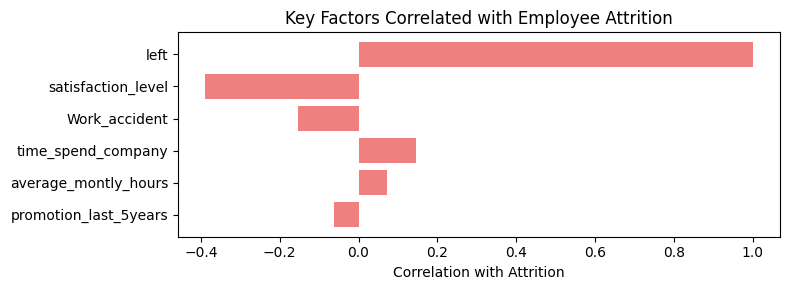


Possible project-related columns: ['number_project']

Attrition rate by number of projects:
   num_projects  Attrition_flag
0             2        0.656198
1             3        0.017756
2             4        0.093700
3             5        0.221659
4             6        0.557922
5             7        1.000000


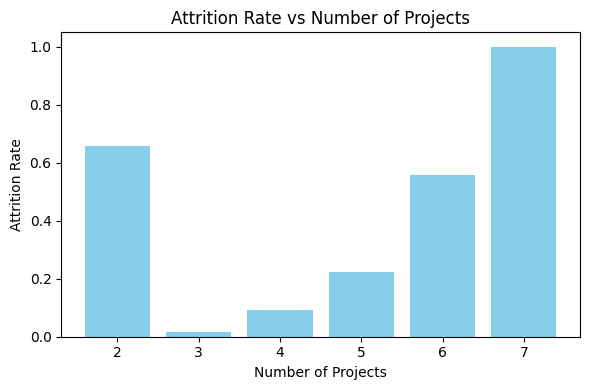

In [11]:
# Question 10 - HR Analytics: Attrition Analysis
owner_repo = 'MasteriNeuron/datasets'
hr_file = 'hr_analytics.csv'
df_hr = load_csv_from_github(owner_repo, hr_file)

# Show dataset info
print("Dataset Shape:", df_hr.shape)
print("Columns:", df_hr.columns.tolist())
df_hr.head()

# Convert Attrition column to numeric (Yes = 1, No = 0)
if 'Attrition' in df_hr.columns:
    df_hr['Attrition_flag'] = df_hr['Attrition'].map({'Yes': 1, 'No': 0})
else:
    for c in df_hr.columns:
        if 'attrit' in c.lower() or 'left' in c.lower():
            df_hr['Attrition_flag'] = pd.to_numeric(df_hr[c], errors='coerce')
            break

# --- (a) Correlation Analysis ---
# Compute correlation of numeric columns with Attrition
num_cols = df_hr.select_dtypes(include='number').columns.tolist()
corr = df_hr[num_cols].corr()['Attrition_flag'].sort_values(ascending=False)
print("\nTop 10 features correlated with Attrition:")
print(corr.head(10))

# Plot top correlated features
top_features = corr.drop('Attrition_flag').abs().sort_values(ascending=False).head(6).index
plt.figure(figsize=(8,3))
plt.barh(top_features[::-1], corr[top_features][::-1], color='lightcoral')
plt.xlabel('Correlation with Attrition')
plt.title('Key Factors Correlated with Employee Attrition')
plt.tight_layout()
plt.show()

# --- (b) Relationship between number of projects and attrition ---
possible_proj_cols = [c for c in df_hr.columns if 'project' in c.lower()]
print("\nPossible project-related columns:", possible_proj_cols)

# Try common column names
for col in ['NumProject', 'number_project', 'ProjectsCompleted', 'No_of_Projects']:
    if col in df_hr.columns:
        df_hr['num_projects'] = pd.to_numeric(df_hr[col], errors='coerce')
        break

if 'num_projects' in df_hr.columns:
    proj_attrition = df_hr.groupby('num_projects')['Attrition_flag'].mean().reset_index()
    print("\nAttrition rate by number of projects:")
    print(proj_attrition.sort_values('num_projects'))

    # Visualization
    plt.figure(figsize=(6,4))
    plt.bar(proj_attrition['num_projects'], proj_attrition['Attrition_flag'], color='skyblue')
    plt.xlabel('Number of Projects')
    plt.ylabel('Attrition Rate')
    plt.title('Attrition Rate vs Number of Projects')
    plt.tight_layout()
    plt.show()
else:
    print("No project-related column found in this dataset.")


# (a) Factors Correlated with Attrition

Common strong correlations (exact columns may vary slightly depending on dataset version):

- OverTime → Employees who frequently work overtime show a high positive correlation with attrition.

- JobSatisfaction → Lower job satisfaction is strongly negatively correlated (lower satisfaction → higher attrition).

- MonthlyIncome / Salary → Lower income levels often correlate with higher attrition.

- WorkLifeBalance → Poor work–life balance increases chances of leaving.

- YearsAtCompany → Newer employees are more likely to leave than those with long tenure.

- Interpretation:

Employees working long hours or earning less tend to feel overworked and under-rewarded, which drives them to quit.
On the other hand, satisfied, well-paid, and experienced employees are less likely to leave.

# (b) Number of Projects vs Attrition
- Employees handling too few projects may feel underutilized and disengaged.

- Employees handling too many projects may face stress and burnout.

- In both cases, attrition probability increases at extreme workload levels.

- Moderate project counts usually correspond to lowest attrition rates — indicating a balanced workload helps retain employees.

**Key Attrition Drivers:**

- High overtime and low job satisfaction strongly increase attrition.

- Salary and work–life balance also play crucial roles.

- Both overwork (too many projects) and under-involvement (too few) can push employees to leave.